In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
def squaredErrorCost(theta,X,Y):
    return ((np.matmul(X,theta) - Y)**2).sum()/(X.shape[0])

In [4]:
def linearHypothesis(theta,X):
    return np.matmul(X,theta)

In [5]:
def predict(X_test,theta):
    
    X_test = np.c_[X_test,np.ones(X_test.shape[0])]
    print(X_test[4])
    return np.matmul(X_test,theta)

In [6]:
#Expects 2D X_train of shape (n,fc) and 1D Y_train of shape (n,)

def fitGradientDescent(X_train,Y_train,learning_rate=0.1,tolerance=0.000000001,max_iterations=1000000): #X_train can be np 2D array
    n,fc = X_train.shape #fc is feature_count, n is no.of training samples
    #Setting x[0] as 1s
    X_train = np.c_[X_train,np.ones(n)]
    print(X_train[4])
    #Now X_train's shape is (n,fc+1)
    Y_train = Y_train.reshape((len(Y_train),1))
    #Initializing theta with shape (fc+1,1)
    theta = np.zeros((fc+1,1))
#     print("X shape is ",X_train.shape)
#     print("theta shape is ",theta.shape)
    
    cost_values = []
    iterations = []
    count = 0
    cost = squaredErrorCost(theta,X_train,Y_train)
    
    delta_cost = cost
    while(delta_cost >= tolerance and count <= max_iterations):
        #Updating parameters based on formula and maths
        hypothesis = linearHypothesis(theta,X_train)
        error = hypothesis - Y_train
        theta_derivative =  (np.matmul(X_train.T,error))/n # (fc+1,n)*(n,1) = (fc+1,1)
        theta = theta - theta_derivative*learning_rate
        
        #For plotting curve of error value vs no. of iterations
        if (count%10 == 0):
            cost_values.insert(len(cost_values),cost) 
            iterations.insert(len(iterations),count)
        
        #Updated error value with new values of parameters and iteration count
        new_cost = squaredErrorCost(theta,X_train,Y_train)
        delta_cost = abs(new_cost - cost)
        cost = new_cost
        count = count + 1
        
    print("Stopped after",count,"iterations", "cost : ",cost)
    style.use('ggplot')
    plt.plot(iterations,cost_values)
    plt.xlabel("No. Of Iterations")
    plt.ylabel("Value Of Squared Error Function")
    plt.title("Cost Vs Iterations")
    plt.show() #Should be decreasing for checking correct movement of gradient descent
    return theta

[-0.41240845 -0.48772236 -0.96982713 -0.27259857 -0.91302881 -0.38413697
 -0.83478091  0.30050808 -0.75292215 -0.95763307  0.0205596   0.43107437
  0.02900711  1.        ]
Stopped after 5335 iterations cost :  23.4660511213


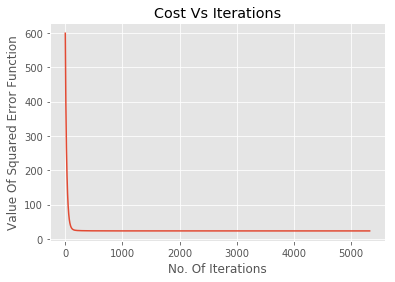

[-0.40588212 -0.48772236 -0.37597609 -0.27259857 -0.29970737 -0.12769841
 -0.50406759 -0.48356578 -0.52300145 -0.14395131  1.13022958  0.40366347
  0.04863144  1.        ]
(127, 1)
(127,)


In [15]:
train = np.loadtxt("Boston Gradient Project/BostonXYtrain.csv",delimiter=",")

x = train[:,0:-1]
y = train[:,-1]
theta = fitGradientDescent(x,y,learning_rate=0.02)

testx = np.loadtxt("Boston Gradient Project/BostonXtest.csv",delimiter=",")
y_pred = predict(testx,theta);
print(y_pred.shape)
y_pred1 = y_pred[:,0]

print(y_pred1.shape)
np.savetxt("BostonGradientRyuk.csv",y_pred1,delimiter=",")

[-1.39532857 -1.11823576  0.63492343  1.31182202  1.        ]
Stopped after 941 iterations cost :  20.911749038


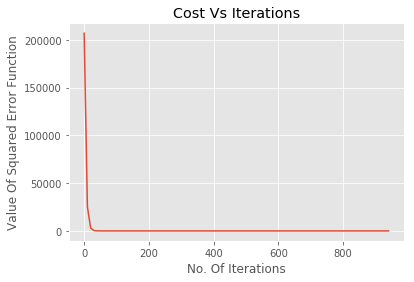

[[ -1.49022027e+01]
 [ -2.89466794e+00]
 [  3.49837971e-01]
 [ -2.34213002e+00]
 [  4.54431293e+02]]
[-0.39762378 -1.36439032 -0.21796074 -0.30763698  1.        ]


In [12]:
from sklearn import preprocessing
train = np.loadtxt("Gradient power plant/XYtrain.csv",delimiter=",")

x = train[:,0:-1]
y = train[:,-1]
x_scale = preprocessing.scale(x)
theta1 = fitGradientDescent(x_scale,y,learning_rate=0.1,max_iterations = 1000)
print(theta1)
testx = np.loadtxt("Gradient power plant/Xtest.csv",delimiter=",")
testx = preprocessing.scale(testx)
y_pred1 = predict(testx,theta1)

np.savetxt("PowerPlantY.csv",y_pred1,delimiter=',',fmt='%0.5f')